# Definisi library yang di gunakan

In [0]:
import pandas as pd  #Digunakan untuk membaca dataset
import numpy as np    #Numpy untuk melakukan perhitungan yang efisien
from matplotlib import pyplot as plt #Matplotlib untuk visualisasi data

# Memasukkan data-set ke Variable

In [3]:
lokasiData = "drive/My Drive/Tubes Manli/used_cars.csv"
ds = pd.read_csv(lokasiData) #ds = data set
ds.head

<bound method NDFrame.head of        Unnamed: 0          id  ...      lat     long
0               0  7034441763  ...  40.7372 -111.858
1               1  7034440610  ...  40.5881 -111.884
2               2  7034440588  ...  40.5881 -111.884
3               3  7034440546  ...  40.5881 -111.884
4               4  7034406932  ...  40.3744 -104.694
...           ...         ...  ...      ...      ...
19996       19996  7049052853  ...  46.2348 -119.128
19997       19997  7049052797  ...  46.5642 -120.496
19998       19998  7049049369  ...  46.0783 -118.293
19999       19999  7049042761  ...  46.5642 -120.496
20000       20000  7049039610  ...  46.2348 -119.128

[20001 rows x 26 columns]>

Dari hasil di atas dapat disimpulkan bahwa, jumlah :
1. tuple = 20001
2. kolom = 26

# Mengenali data-set

  - Data set merupakan data mobil second(sudah terpakai)
  - Data set digunakan untuk penjualan mobil second

# Pada langkah selanjutkan akan dimulai memvalidasi data
1. Menganalisa data-set 

2. Mendrop :
  - kolom dengan missing value yang lebih dari setengah jumlah tuple di dalam dataset. (kolom size dan county)
  - kolom url, region_url, image_url, description. Karena di asumsikan bahwa tidak ada pemrosesan data media.
  - kolom vin. dari value setiap kolom vin, dapat disimpulkan bawah ini nomor plat kendaraan. Di drop karena tidak dibutuhkan dalam penjualan mobil
  - kolom state, lang, lat. Karena secara garis besar kolom ini merupakan kolom yang menunjukan wilayah kendaraan tersebut dengan akurat. Namun untuk pemrosesan data, saya mendrop kolom-kolom ini dan mensisakan kolom region
  - kolom unnamed. karena kolom ini sama seperti index dan nilainya bersifat increment serta atribut ini biasanya auto-generated. 
  - kolom id. 

In [4]:
ds.isnull().sum() #1

Unnamed: 0          0
id                  0
url                 0
region              0
region_url          0
price               0
year               12
manufacturer      705
model             265
condition        9152
cylinders        7085
fuel               73
odometer         2389
title_status      110
transmission      190
vin              6645
drive            4642
size            13115
type             3659
paint_color      5514
image_url           0
description         0
county          20001
state               0
lat              1031
long             1031
dtype: int64

In [0]:
#2 Drop kolom county
ds.drop(ds.columns[ds.columns.str.contains('county',case = False)],axis = 1, inplace = True)
ds.to_csv(lokasiData) 

# Drop kolom size
ds.drop(ds.columns[ds.columns.str.contains('size',case = False)],axis = 1, inplace = True)
ds.to_csv(lokasiData) 

# Drop kolom url
ds.drop(ds.columns[ds.columns.str.contains('url',case = False)],axis = 1, inplace = True)
ds.to_csv(lokasiData) 

# Drop kolom region_url
ds.drop(ds.columns[ds.columns.str.contains('region_url',case = False)],axis = 1, inplace = True)
ds.to_csv(lokasiData) 

# Drop kolom image_url
ds.drop(ds.columns[ds.columns.str.contains('image_url',case = False)],axis = 1, inplace = True)
ds.to_csv(lokasiData) 

# Drop kolom description
ds.drop(ds.columns[ds.columns.str.contains('description',case = False)],axis = 1, inplace = True)
ds.to_csv(lokasiData) 

# Drop kolom vin
ds.drop(ds.columns[ds.columns.str.contains('vin',case = False)],axis = 1, inplace = True)
ds.to_csv(lokasiData) 

# Drop kolom state
ds.drop(ds.columns[ds.columns.str.contains('state',case = False)],axis = 1, inplace = True)
ds.to_csv(lokasiData) 

# Drop kolom lat
ds.drop(ds.columns[ds.columns.str.contains('lat',case = False)],axis = 1, inplace = True)
ds.to_csv(lokasiData) 

# Drop kolom long
ds.drop(ds.columns[ds.columns.str.contains('long',case = False)],axis = 1, inplace = True)
ds.to_csv(lokasiData) 

# Drop kolom unnamed
ds.drop(ds.filter(regex="Unnamed"),axis=1, inplace=True)
ds.to_csv(lokasiData, index=False, sep=',')


In [0]:
#Drop kolom ID
ds.drop(ds.columns[ds.columns.str.contains('id',case = False)],axis = 1, inplace = True)
ds.to_csv(lokasiData) 

Lakukan pemeriksaan apakah csv telat terupdate.

In [7]:
ds.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,salt lake city,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,hatchback,black
1,salt lake city,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,4wd,NaN,NaN
2,salt lake city,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,4wd,NaN,white
3,salt lake city,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,4wd,NaN,NaN
4,salt lake city,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,4wd,pickup,white


# Selanjutnya penaganan **Missing Value**

Pada bagian ini saya akan mengecek kembali jumlah missing value di setiap kolom.

In [8]:
ds.isnull().sum()

region             0
price              0
year              12
manufacturer     705
model            265
condition       9152
cylinders       7085
fuel              73
odometer        2389
title_status     110
transmission     190
drive           4642
type            3659
paint_color     5514
dtype: int64

Selanjutnya, 
1. lakukan analisa pada setiap kolom.
2. Menentukan tipe data setiap kolom :
  - int = [price, odometer] 
  - nominal = [region, manufacturer, model, paint color, fuel] 
  - ordinal = [year, condition, cylinders, title_status, transmission, drive, type]
3. Dari setiap tipe data, tangani yang masih memiliki banyak missing value.  Tangani missing value *price* dengan di drop, *odometer* dengan rata-rata, dan *sisanya* dengan modus.

Asumsikan, sangat sedikit jumlah orang yang ingin membeli kendaraan dalam keadaan cacat. Maka, status kendaraan yang cacat akan di drop (missing, parts only, salvage)

In [0]:
ds.drop(ds[ds.title_status == 'missing' ].index, inplace=True)
ds.drop(ds[ds.title_status == 'parts only' ].index, inplace=True)
ds.drop(ds[ds.title_status == 'salvage' ].index, inplace=True)

In [0]:
#Isi missing value odometer dengan mean
ds['odometer'] = ds['odometer'].fillna(ds['odometer'].mean())

Asumsikan, tidak ada mobil dengan harga dibawah $1600

In [0]:
ds.drop(ds[ds.price < 1600 ].index, inplace=True)

In [27]:
ds[(ds['price']<1600)] #cek perubahan

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color


Condition suatu mobil penting untuk menentukan mobil itu diminati atau tidak, namun missing value pada atribut ini sebesar 9152 (mendekati setengahnya dari total data). Maka, kita lihat distribusi datanya terlebih dahulu sebelum mengisi dengan modus.

In [28]:
ds['condition'].value_counts()

excellent    5185
good         3853
like new      645
fair          178
new            25
salvage         9
Name: condition, dtype: int64

Dengan kolom yang telah didefinisikan tipe datanya. Maka, saya urutkan datanya berdasarkan peringkat, yaitu salvage < fair < good < excellent < like new < new. Maka saya memutuskan untuk tetap mengisi *missing value* pada kolom condition dengan modus, karena modusnya merupakan nilai tengah.

In [0]:
temp = ['year','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','type','paint_color']
for j in temp:
  ds[j] = ds[j].fillna(ds[j].mode().values[0])

Lakukan pemeriksaan ulang apakah masih ada missing value

In [30]:
ds.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64

# Selanjutnya penanganan **Outlier**

Mengatasi outlier pada atribut: 
- price 
- year 
- odometer 
- Atribut 'year' memiliki tipe data float64, maka masih bisa dilakukan deteksi outlier. 

Selain itu deteksi outlier juga perlu untuk mendeteksi data cacat(salah input) seperti mobil yang tahun pembuatannya di bawah tahun ditemukannya mobil (jika terdapat tuple seperti ini).

In [31]:
#saya akan mengupload library baru agar dapat melihat penyebaran data price, year, dan odometer di dalam boxplot
import seaborn as sea

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


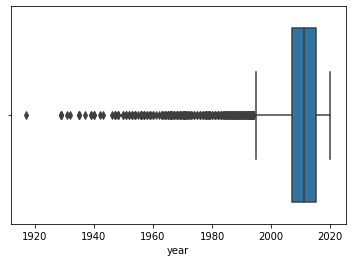

In [36]:
sea.boxplot(ds['year'])

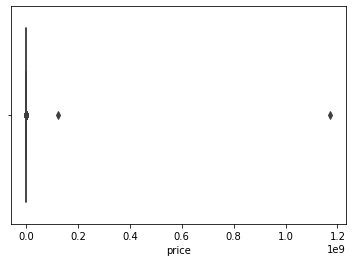

In [37]:
sea.boxplot(ds['price'])

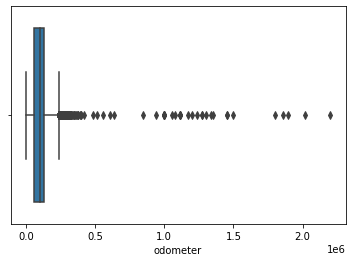

In [38]:
sea.boxplot(ds['odometer'])

Menvisualisasi data dengan boxplot tidak bagus karena persebaran data yang tidak bagus. Maka, akan di lakukan fungsi **Remove Outlier** untuk ketiga kolom ini.

In [0]:
def ROutlier(ds,column):
    q1 = ds[column].quantile(0.25)
    q3 = ds[column].quantile(0.75)
    interq = q3-q1
    batasBawah = q1-1.5*interq
    batasAtas = q3+1.5*interq
    ds_out =  ds.loc[(ds[column] > batasBawah) & (ds[column] < batasAtas)]
    return ds_out

In [0]:
#Remove outlier dilakukan dua kali, yang pertama untuk handling outlier dan yang kedua untuk recheck 
ds = ROutlier(ds, 'year')
ds = ROutlier(ds, 'year')

Tampilkan boxplot *year* untuk mengvisualisasikan data setelah outlier dihapus

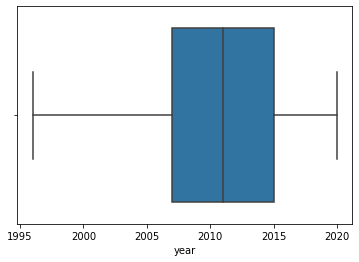

In [43]:
sea.boxplot(ds['year'])

In [0]:
#Remove outlier dilakukan dua kali, yang pertama untuk handling outlier dan yang kedua untuk recheck 
ds = ROutlier(ds, 'price')
ds = ROutlier(ds, 'price')

Tampilkan boxplot *price* untuk mengvisualisasikan data setelah outlier dihapus

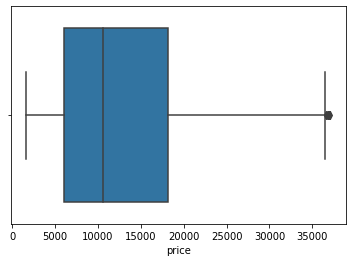

In [46]:
sea.boxplot(ds['price'])

In [0]:
#Remove outlier dilakukan dua kali, yang pertama untuk handling outlier dan yang kedua untuk recheck 
ds = ROutlier(ds, 'odometer')
ds = ROutlier(ds, 'odometer')

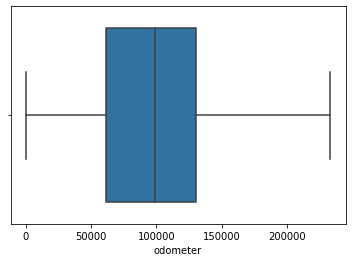

In [48]:
sea.boxplot(ds['odometer'])

In [0]:
#Mengubah data untuk nantinya ditempelkan atribut kelas
ds.to_csv("drive/My Drive/Tubes Manli/clean_data.csv")

# Selanjutnya adalah **Modifikasi Tipe Data Nominal dan Ordinal**

Data *ordinal* diubah dengan replacing dan data *nominal* diubah menggunakan encoder.

In [0]:
ds['condition'] = ds['condition'].replace({'salvage': 1, 'fair': 2, 'good': 3, 'excellent':4, 'like new':5, 'new':6})

ds['cylinders'] = ds['cylinders'].replace({'other': 1, '3 cylinders': 2, '4 cylinders': 3, '5 cylinders':4,
                                           '6 cylinders':5, '8 cylinders':6, '10 cylinders':7, '12 cylinders':8})

ds['title_status'] = ds['title_status'].replace({'lien': 1, 'rebuilt':2, 'clean':3})

ds['transmission'] = ds['transmission'].replace({'other':1, 'manual':2, 'automatic':3})

ds['drive'] = ds['drive'].replace({'fwd':1, 'rwd':2, '4wd':3})

ds['type'] = ds['type'].replace({'other':1, 'hatchback':2, 'wagon':3, 'sedan':4, 'mini-van':5, 'van':6, 'pickup':7,
                                 'SUV':8, 'offroad':9, 'truck':10, 'bus':11, 'coupe':12, 'convertible':13})

In [0]:
#diperlukan library baru untuk encode data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
temp = ['region','manufacturer','model','fuel','paint_color']
for i in temp:
  temp2 = LabelEncoder()
  ds[i] = temp2.fit_transform(ds[i].astype('str'))

Periksa kembali kolom-kolom yang memiliki tipe data selain numerik

In [59]:
ds.dtypes

region            int64
price             int64
year            float64
manufacturer      int64
model             int64
condition         int64
cylinders         int64
fuel              int64
odometer        float64
title_status      int64
transmission      int64
drive             int64
type              int64
paint_color       int64
dtype: object

Ubah tipe data *year* dan *oodmeter* menjadi int64

In [0]:
ds['odometer'].astype(np.int64)

In [0]:
ds['year'].astype(np.int64)

Periksa kembali tipe datanya

In [67]:
ds.dtypes

region            int64
price             int64
year            float64
manufacturer      int64
model             int64
condition         int64
cylinders         int64
fuel              int64
odometer          int64
title_status      int64
transmission      int64
drive             int64
type              int64
paint_color       int64
dtype: object

Setelah dicoba untuk diubah namun gagal, jadi saya abaikan saja.

# Selanjutnya **Scalling dengan MinMax**

Pada langkah berikutnya saya akan import library baru untuk melakukan *scalling*

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
minmax = MinMaxScaler()
ds_new = minmax.fit_transform(ds)
ds_new = pd.DataFrame(ds_new,columns=ds.columns)

In [0]:
ds = ds_new

In [0]:
ds.to_csv("drive/My Drive/Tubes Manli/used_cars_scaling.csv") 

Range data setiap kolom sudah sama

# Selanjutnya **Reduksi Dimensi**

Dengan menambahkan library PCA untuk langkah ini.
Saat ini saya menggunakan PCA dengan library dengan n components 0.3 agar menghasilkan 2 atribut.

In [0]:
from sklearn.decomposition import PCA

In [0]:
#Mencari Hasil PCA, ditransform ke 0.3 supaya tersisa 2 atribut untuk clustering
temp = PCA(n_components=0.30, whiten=True)

ds_pca = temp.fit_transform(ds)

In [0]:
ds_pca = pd.DataFrame(ds_pca)

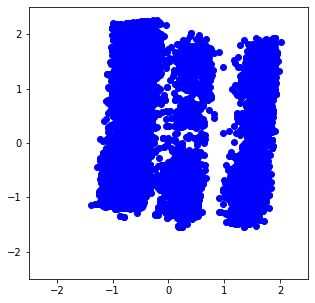

In [78]:
fig = plt.figure(figsize=(5,5))
plt.scatter(ds_pca[0], ds_pca[1], color = 'blue')
plt.xlim(-2.5,2.5) #limit disesuaikan dengan persebaran data agar terlihat jelas
plt.ylim(-2.5,2.5)
plt.show()

In [0]:
ds_pca.to_csv("drive/My Drive/Tubes Manli/used_cars_pca.csv")
#Menyimpan hasil pca dalam dataset

#Selanjutnya **Clustering**

Data dengan 2 atribut dari hasil PCA digunakan untuk membangun model K-Means clustering 3 kelas. Hal ini dikarenakan K-Means clustering memerlukan 2 atribut.

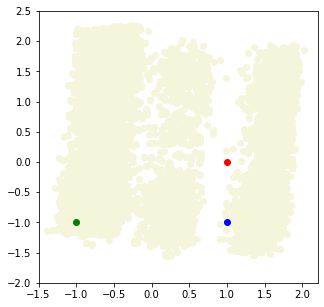

In [80]:
i = ds_pca.iloc[:, 0] #matrix baru, pakai semua baris, kecuali kolom terakhir
j = ds_pca.iloc[:, 1] #matrix baru, pakai semua baris, tapi kolom kelas saja

k = {'x':i, 'y':j}

ds_pca = pd.DataFrame(k)

np.random.seed(200)
o = 3

centroids = {
    i+1: [np.random.randint(-1.5, 2), np.random.randint(-1.6,2.5)]
    for i in range(o)
}

fig = plt.figure(figsize=(5,5))
plt.scatter(ds_pca['x'], ds_pca['y'], color='beige')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(-1.5,2.2)
plt.ylim(-2,2.5)
plt.show()

          x         y  distance_from_1  ...  distance_from_3  closet  color
0 -0.252070  2.060346         2.410955  ...         3.306568       1      r
1 -0.678047 -0.139626         1.683846  ...         1.885759       2      g
2 -1.086789 -0.562375         2.161239  ...         2.132183       2      g
3 -0.830786 -0.491555         1.895628  ...         1.900078       2      g
4 -0.745561 -0.508578         1.818140  ...         1.813416       2      g

[5 rows x 7 columns]


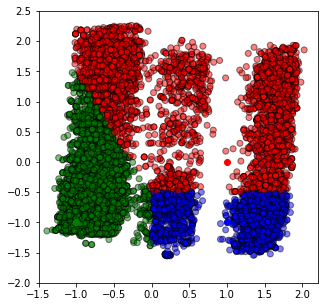

In [81]:
def assignment(ds, centroids):
    for i in centroids.keys():
        ds['distance_from_{}'.format(i)] = (
            np.sqrt(
                (ds['x'] - centroids[i][0]) ** 2
                + (ds['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    ds['closet'] = ds.loc[:, centroid_distance_cols].idxmin(axis = 1)
    ds['closet'] = ds['closet'].map(lambda x : int(x.lstrip('distance_from_')))
    ds['color'] = ds['closet'].map(lambda x : colmap[x])
    return ds

ds_pca = assignment(ds_pca,centroids)
print(ds_pca.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(ds_pca['x'], ds_pca['y'], color = ds_pca['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(-1.5,2.2)
plt.ylim(-2,2.5)
plt.show()

In [0]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
  for i in centroids.keys():
    centroids[i][0] = np.mean(ds_pca[ds_pca['closet'] == i]['x'])
    centroids[i][1] = np.mean(ds_pca[ds_pca['closet'] == i]['y'])
  return k

In [0]:
centroids = update(centroids)

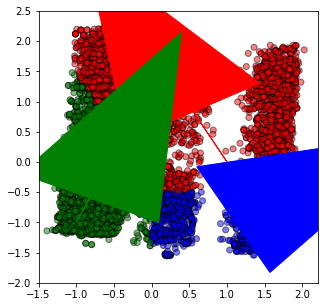

In [84]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(ds_pca['x'], ds_pca['y'], color = ds_pca['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(-1.5,2.2)
plt.ylim(-2,2.5)

for i in old_centroids.keys():
  old_x = old_centroids[i][0]
  old_y = old_centroids[i][1]
  dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
  dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
  ax.arrow(old_x, old_y, dx, dy, head_width = 2, head_length=3, fc = colmap[i], ec= colmap[i])

plt.show()

In [0]:
#Assignment ulang
ds_pca = assignment(ds_pca,centroids)

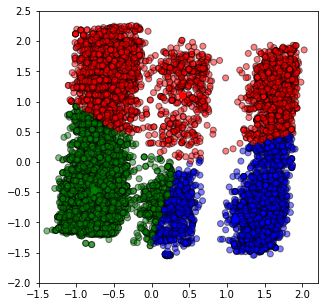

In [87]:
#Plot results
fig = plt.figure(figsize=(5,5))
plt.scatter(ds_pca['x'], ds_pca['y'], color = ds_pca['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(-1.5,2.2)
plt.ylim(-2,2.5)
plt.show()

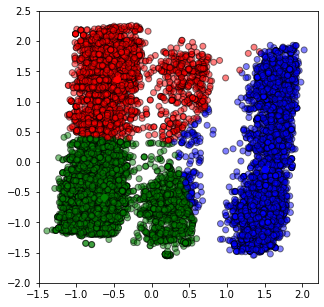

In [88]:
while True:
  closest_centroids = ds_pca['closet'].copy(deep=True)
  centroids = update(centroids)
  ds_pca = assignment(ds_pca, centroids)
  if closest_centroids.equals(ds_pca['closet']):
    break

#Membuat plot hasil
fig = plt.figure(figsize=(5,5))
plt.scatter(ds_pca['x'], ds_pca['y'], color = ds_pca['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i])
plt.xlim(-1.5,2.2)
plt.ylim(-2,2.5)
plt.show()

Lakukan pemeriksaan kembali dengan melihat 4 data teratas

In [89]:
ds_pca.head()

,x,y,distance_from_1,distance_from_2,distance_from_3,closet,color
0,-0.252070,2.060346,0.712858,2.673877,2.802842,1,r
1,-0.678047,-0.139626,1.534180,0.449370,2.185806,2,g
2,-1.086789,-0.562375,2.039518,0.456354,2.631710,2,g
3,-0.830786,-0.491555,1.906769,0.221147,2.367612,2,g
4,-0.745561,-0.508578,1.909013,0.138507,2.286297,2,g


Pada bagian ini saya tambahkan kolom baru, yaitu *closet*. *closet* ini merupakan kolom hasil **clustering**. Masukkan kolom ini ke dataFrame setelah scalling untuk digunakan oleh bagian **klasifisi**. Maka, saya masukkan kolom tersebut kedalam dataset utama

In [0]:
ds['class'] = ds_pca['closet']

Lakukan pengecekan apakah kolom sudah masuk

In [91]:
ds.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,class
0,0.75,0.459127,0.666667,0.972222,0.517554,0.6,0.285714,0.5,0.272415,1.0,0.5,1.0,0.083333,0.000000,1
1,0.75,0.349268,0.541667,0.833333,0.414277,0.6,0.571429,0.5,0.515045,1.0,1.0,1.0,0.500000,0.818182,2
2,0.75,0.926761,0.875000,0.277778,0.427150,0.6,0.571429,0.0,0.409627,1.0,1.0,1.0,0.500000,0.909091,2
3,0.75,0.363380,0.458333,0.305556,0.788473,0.6,0.571429,0.5,0.383269,1.0,1.0,1.0,0.500000,0.909091,2
4,0.75,0.307042,0.708333,0.277778,0.422469,0.6,0.571429,0.5,0.969674,1.0,1.0,1.0,0.500000,0.909091,2


# Selanjutnya **Classification**
Klasifikasi yang saya lakukan dengan menggunakan model Naive Bayes dan KNN. Data masukan adalah data sesudah scaling karena kedua model ini membaca masukan yang berfifat numerikal.

Saya akan meng-import library yang digunakan untuk klasifikasi dengan Naive Bayes dan KNN.

In [0]:
import collections

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

Split dataset dilakukan satu kali sekaligus untuk model Naive Bayes dan KNN, maka data train dan data test pada kedua model adalah **sama**. Dengan ini diharapkan bisa secara real melihat perbandingan performansi kedua model ini.

In [0]:
#Split dataset untuk klasifikasi hanya dilakukan satu kali, maka data test NB == KNN
X = ds.iloc[:, :-1].values #matrix baru, pake semua baris, kecuali kolom terakhir
y = ds.iloc[:, 14].values #matrix baru, pake semua baris, tapi kolom kelas saja
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [0]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [100]:
print(y_pred)
print('\n')
print('\n')
print("Akurasi Model Klasifikasi Naive Bayes:",metrics.accuracy_score(y_test, y_pred))
print('\n')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('\n')
print("Laporan Klasifikasi Naive Bayes")
print(classification_report(y_test,y_pred))

[2 2 1 ... 1 3 3]




Akurasi Model Klasifikasi Naive Bayes: 0.9728331177231565




Confusion Matrix
[[ 670    1    1]
 [  56 1524    0]
 [  11   15  814]]




Laporan Klasifikasi Naive Bayes
              precision    recall  f1-score   support

           1       0.91      1.00      0.95       672
           2       0.99      0.96      0.98      1580
           3       1.00      0.97      0.98       840

    accuracy                           0.97      3092
   macro avg       0.97      0.98      0.97      3092
weighted avg       0.97      0.97      0.97      3092



In [0]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [102]:
print(y_pred)
print('\n')
print('\n')
print("Akurasi Model Klasifikasi KNN:",metrics.accuracy_score(y_test, y_pred))
print('\n')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('\n')
print("Laporan Klasifikasi untuk KNN")
print(classification_report(y_test,y_pred))

[2 2 1 ... 1 3 3]




Akurasi Model Klasifikasi KNN: 0.9809184993531694




Confusion Matrix
[[ 644   24    4]
 [  11 1568    1]
 [   2   17  821]]




Laporan Klasifikasi untuk KNN
              precision    recall  f1-score   support

           1       0.98      0.96      0.97       672
           2       0.97      0.99      0.98      1580
           3       0.99      0.98      0.99       840

    accuracy                           0.98      3092
   macro avg       0.98      0.98      0.98      3092
weighted avg       0.98      0.98      0.98      3092



In [0]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [104]:
print(y_pred)
print('\n')
print('\n')
print("Akurasi Model Klasifikasi Random Forest:",metrics.accuracy_score(y_test, y_pred))
print('\n')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('\n')
print("Laporan Klasifikasi untuk Random Forest")
print(classification_report(y_test,y_pred))

[2 2 1 ... 1 3 3]




Akurasi Model Klasifikasi Random Forest: 0.990620957309185




Confusion Matrix
[[ 668    3    1]
 [   4 1576    0]
 [   4   17  819]]




Laporan Klasifikasi untuk Random Forest
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       672
           2       0.99      1.00      0.99      1580
           3       1.00      0.97      0.99       840

    accuracy                           0.99      3092
   macro avg       0.99      0.99      0.99      3092
weighted avg       0.99      0.99      0.99      3092



In [0]:
temp5 = pd.read_csv("drive/My Drive/Tubes Manli/clean_data.csv")

In [0]:
temp5.drop(temp5.filter(regex="Unnamed"),axis=1, inplace=True)
temp5.to_csv("drive/My Drive/Tubes Manli/clean_data.csv", index=False)

Melihat kembali dataset setelah *scalling* dan sebelum *scalling* pada 4 data terakhir.

In [111]:
temp5.tail()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
15452,kennewick-pasco-richland,2200,2005.0,nissan,murano,good,6 cylinders,gas,179000.0,clean,automatic,4wd,SUV,brown
15453,kennewick-pasco-richland,24999,2017.0,subaru,wrx premium awd gas sedan,excellent,6 cylinders,gas,29894.0,clean,manual,4wd,sedan,silver
15454,kennewick-pasco-richland,12127,2018.0,nissan,sentra,excellent,4 cylinders,gas,32867.0,clean,automatic,fwd,sedan,white
15455,kennewick-pasco-richland,14661,2017.0,toyota,corolla,excellent,4 cylinders,gas,30486.0,clean,automatic,fwd,sedan,white
15456,kennewick-pasco-richland,35999,2019.0,toyota,4runner sr5 4x4 gas suv,excellent,6 cylinders,gas,22078.0,clean,automatic,4wd,SUV,black


In [112]:
ds.tail()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,class
15452,0.3125,0.016901,0.375000,0.750000,0.641018,0.4,0.571429,0.5,0.767911,1.0,1.0,1.0,0.583333,0.181818,1
15453,0.3125,0.659127,0.875000,0.916667,0.964892,0.6,0.571429,0.5,0.128245,1.0,0.5,1.0,0.250000,0.818182,2
15454,0.3125,0.296535,0.916667,0.750000,0.777355,0.6,0.285714,0.5,0.141000,1.0,1.0,0.0,0.250000,0.909091,3
15455,0.3125,0.367915,0.875000,0.944444,0.290228,0.6,0.285714,0.5,0.130785,1.0,1.0,0.0,0.250000,0.909091,3
15456,0.3125,0.968986,0.958333,0.944444,0.083382,0.6,0.571429,0.5,0.094715,1.0,1.0,1.0,0.583333,0.000000,1


In [0]:
#Pindahkan kelas ke clean_data.csv
temp5['value of product'] = ds['class']

Periksa kembali hasil modifikasi

In [120]:
temp5

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,value of product
0,salt lake city,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,4wd,hatchback,black,1
1,salt lake city,13999,2009.0,ram,f-150,excellent,6 cylinders,gas,120057.0,clean,automatic,4wd,pickup,silver,2
2,salt lake city,34500,2017.0,ford,f-350,excellent,6 cylinders,diesel,95484.0,clean,automatic,4wd,pickup,white,2
3,salt lake city,14500,2007.0,gmc,sierra,excellent,6 cylinders,gas,89340.0,clean,automatic,4wd,pickup,white,2
4,salt lake city,12500,2013.0,ford,f-250,excellent,6 cylinders,gas,226031.0,clean,automatic,4wd,pickup,white,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15452,kennewick-pasco-richland,2200,2005.0,nissan,murano,good,6 cylinders,gas,179000.0,clean,automatic,4wd,SUV,brown,1
15453,kennewick-pasco-richland,24999,2017.0,subaru,wrx premium awd gas sedan,excellent,6 cylinders,gas,29894.0,clean,manual,4wd,sedan,silver,2
15454,kennewick-pasco-richland,12127,2018.0,nissan,sentra,excellent,4 cylinders,gas,32867.0,clean,automatic,fwd,sedan,white,3
15455,kennewick-pasco-richland,14661,2017.0,toyota,corolla,excellent,4 cylinders,gas,30486.0,clean,automatic,fwd,sedan,white,3


In [0]:
#data disimpan untuk menyatukan data sebeleum scaling dengan kelas
temp5.to_csv("drive/My Drive/Tubes Manli/clean_data_label.csv")